### Phân tích dữ liệu

In [187]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [223]:
csv_folder="./data/map_ver1/coord_70/"
csv_folder="./data/map_ver1/center_80/"

folder_data = "./data/map_ver_74_41/"
for folder_name in os.listdir(folder_data):
    # if "center" not in folder_name:
    #     continue
    csv_folder = os.path.join(folder_data, folder_name)

    # "count_#6"= tiger
    # "count_#7"= boar
    # "count_#8"= leopard

    count_good=0
    count_dead_boar=0
    count_dead_tiger=0
    count_dead_leopard=0
    data_list=[]
    tiger_list=[]
    boar_list=[]
    leopard_list=[]
    num_data=len(os.listdir(csv_folder))
    for filename in os.listdir(csv_folder):
        data_frame=pd.read_csv(os.path.join(csv_folder,filename))
        last_id=5000 #len(data_frame)-1
        tiger_list.append(data_frame['num_tiger'])
        boar_list.append(data_frame['num_boar'])
        leopard_list.append(data_frame['num_leopard'])
        # data_list.append(data_frame)
        # print(data_frame['count_#6'][10000])
        if data_frame['num_tiger'][last_id]>0 and data_frame['num_boar'][last_id]>0 and data_frame['num_leopard'][last_id]>0:
            count_good+=1
        if data_frame['num_boar'][last_id]==0:
            count_dead_boar+=1
        if data_frame['num_tiger'][last_id]==0:
            count_dead_tiger+=1
        if data_frame['num_leopard'][last_id]==0:
            count_dead_leopard+=1

    print("Loại map: ", folder_name)
    print("Tổng số trường hợp xét: ",len(os.listdir(csv_folder)))
    print("Số trường hợp không con nào chết: ",count_good)
    print("Số trường hợp lợn chết: ",count_dead_boar)
    print("Số trường hợp hổ chết: ",count_dead_tiger)
    print("Số trường hợp báo chết: ",count_dead_leopard)
    print("="*20)
    # print(count_good)
        # break

Loại map:  all_100
Tổng số trường hợp xét:  15
Số trường hợp không con nào chết:  14
Số trường hợp lợn chết:  0
Số trường hợp hổ chết:  1
Số trường hợp báo chết:  0
Loại map:  center_25
Tổng số trường hợp xét:  15
Số trường hợp không con nào chết:  0
Số trường hợp lợn chết:  0
Số trường hợp hổ chết:  15
Số trường hợp báo chết:  15
Loại map:  center_30
Tổng số trường hợp xét:  15
Số trường hợp không con nào chết:  0
Số trường hợp lợn chết:  0
Số trường hợp hổ chết:  15
Số trường hợp báo chết:  12
Loại map:  center_35
Tổng số trường hợp xét:  0
Số trường hợp không con nào chết:  0
Số trường hợp lợn chết:  0
Số trường hợp hổ chết:  0
Số trường hợp báo chết:  0


In [174]:
data_frame=pd.read_csv("./data/map_ver1/center_80/data_00313.csv")
data_frame.keys()
key_list = [key for key in data_frame.keys() if key!="step" ]
key_list

['healthy_food',
 'total_food_energy',
 'num_tiger',
 'num_boar',
 'num_leopard',
 'born_tiger',
 'born_leopard',
 'born_boar',
 'death_tiger_old',
 'death_leopard_old',
 'death_boar_old',
 'death_tiger_hungry',
 'death_leopard_hungry',
 'death_boar_hungry',
 'death_leopard_eaten',
 'death_boar_eaten']

In [191]:
def data_convert(data_frame, column_name):
    if "death" not in column_name and "born" not in column_name:
        return data_frame
    new_column = [data_frame[column_name][i+1] - x for i, x in enumerate(data_frame[column_name][:-1])] 
    data_frame[column_name]=[data_frame[column_name][0]]+new_column
    return data_frame

In [229]:
def draw_data(csv_folder, column_name, size = (5, 5), max_len = 5000):
    data_list=[]
    for filename in tqdm(os.listdir(csv_folder)):
        data_frame=pd.read_csv(os.path.join(csv_folder,filename))
        data_frame=data_convert(data_frame, column_name)
        last_id = max_len
        data_column= data_frame[column_name][:last_id]
        data_list.append(data_column)
    data_list = np.array(data_list)
   
    mean_values = np.mean(data_list, axis=0)
    
    # Tính khoảng giá trị của từng cột (min-max)
    min_values = np.min(data_list, axis=0)
    max_values = np.max(data_list, axis=0)

    plt.figure(figsize=size)
    # Đặt tên cho trục và tiêu đề
    plt.xlabel('Step')
    plt.ylabel(column_name)
    plt.title(f'{column_name} from {len(data_list)} tables')

    # Tạo biểu đồ đường
    x = np.arange(data_list.shape[1]) + 1  # Trục x là số bảng (1 đến 20)
    plt.plot(x, mean_values, label='Mean')
    plt.fill_between(x, min_values, max_values, alpha=0.3, label='Range')
    # Hiển thị chú thích
    plt.legend()
    
    plt.show()



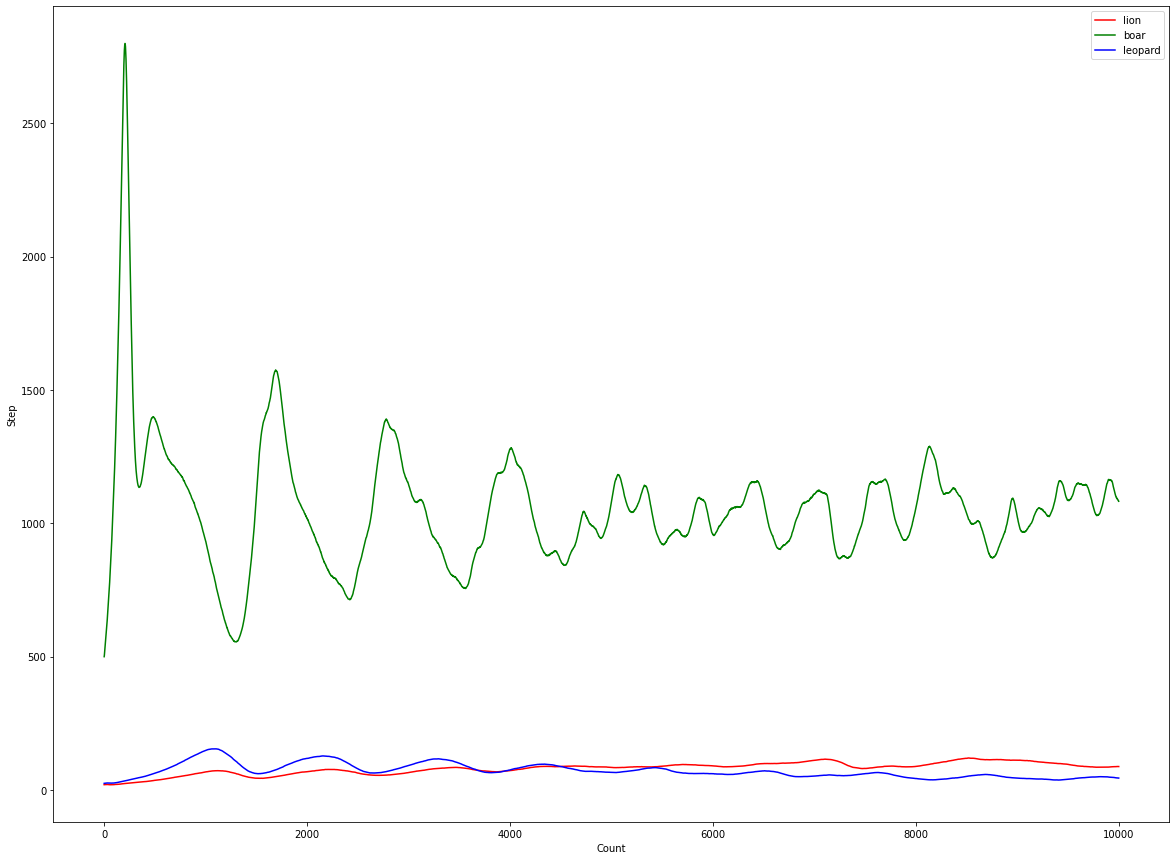

In [23]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)


x=[i for i in range(len(data_frame["count_#6"]))]

y1=sum(tiger_list)/num_data
y2=sum(boar_list)/num_data
y3=sum(leopard_list)/num_data

# Plotting both the curves simultaneously
plt.plot(x, y1, color='r', label='tiger')
plt.plot(x, y2, color='g', label='boar')
plt.plot(x, y3, color='blue', label='leopard')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Count")
plt.ylabel("Step")
# plt.title("Sine and Cosine functions")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [13]:
45/147*0.5

0.15306122448979592

all_100


100%|██████████| 50/50 [00:01<00:00, 29.85it/s]


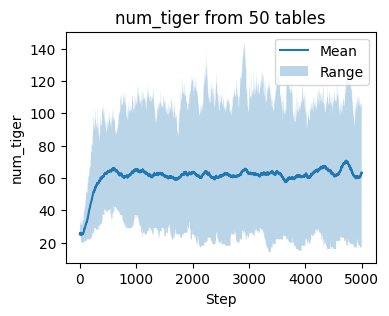

100%|██████████| 50/50 [00:00<00:00, 89.71it/s]


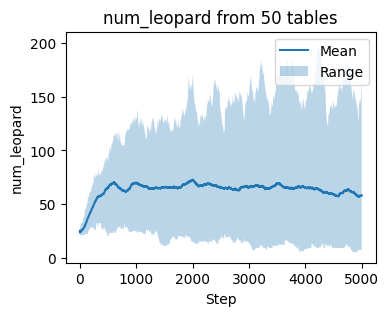

center_25


100%|██████████| 50/50 [00:01<00:00, 36.86it/s]


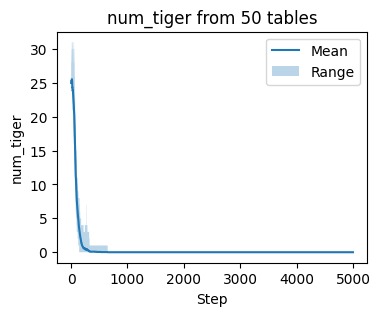

100%|██████████| 50/50 [00:00<00:00, 90.49it/s]


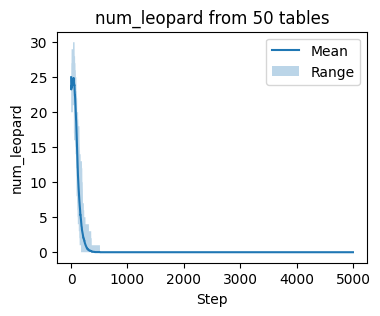

center_30


100%|██████████| 50/50 [00:01<00:00, 36.40it/s]


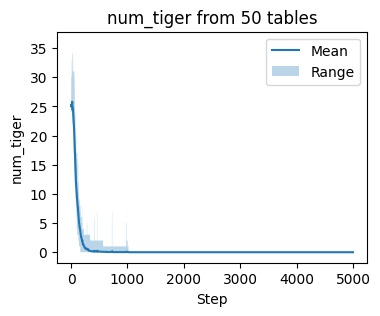

100%|██████████| 50/50 [00:00<00:00, 95.85it/s] 


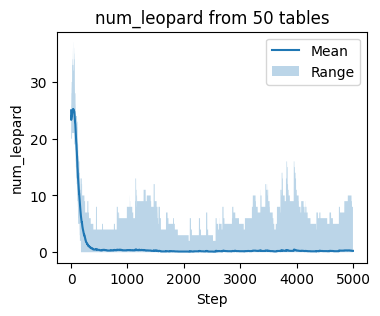

center_35


100%|██████████| 50/50 [00:01<00:00, 37.30it/s]


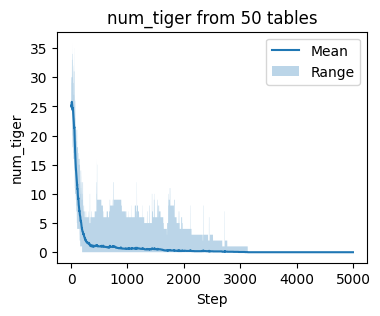

100%|██████████| 50/50 [00:00<00:00, 97.68it/s]


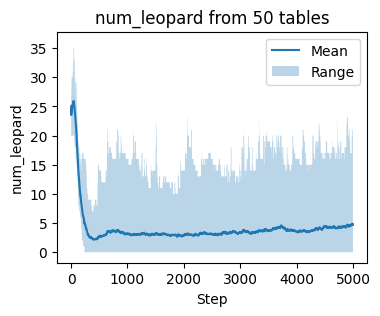

center_40


100%|██████████| 50/50 [00:01<00:00, 34.28it/s]


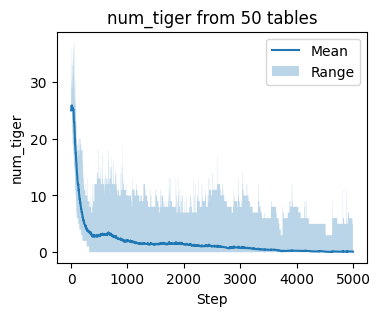

100%|██████████| 50/50 [00:00<00:00, 92.79it/s]


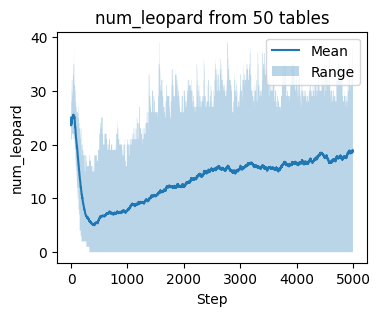

center_45


100%|██████████| 50/50 [00:01<00:00, 32.48it/s]


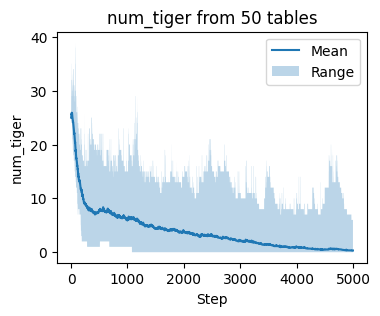

100%|██████████| 50/50 [00:00<00:00, 103.89it/s]


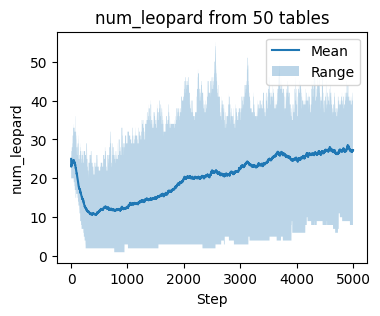

center_50


100%|██████████| 50/50 [00:01<00:00, 33.16it/s]


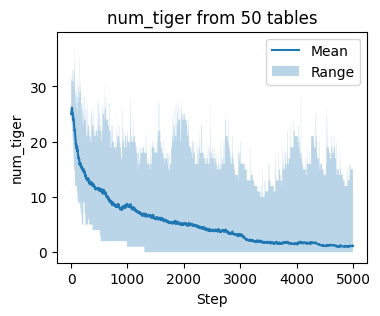

100%|██████████| 50/50 [00:00<00:00, 85.21it/s]


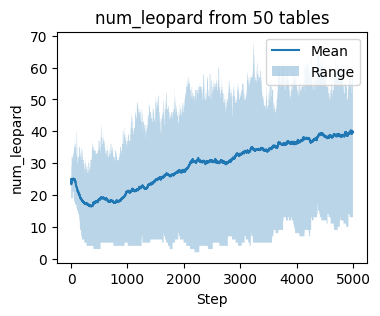

center_55


100%|██████████| 50/50 [00:01<00:00, 32.62it/s]


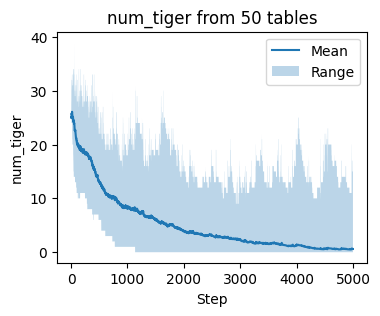

100%|██████████| 50/50 [00:00<00:00, 97.90it/s]


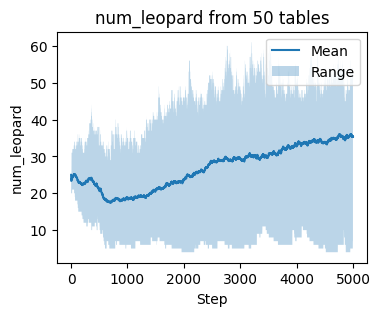

center_60


100%|██████████| 50/50 [00:01<00:00, 34.23it/s]


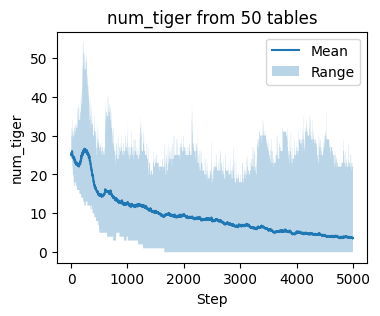

100%|██████████| 50/50 [00:00<00:00, 101.43it/s]


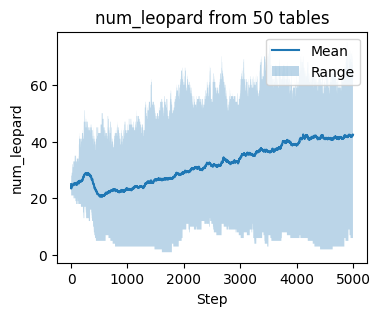

center_65


100%|██████████| 50/50 [00:01<00:00, 33.37it/s]


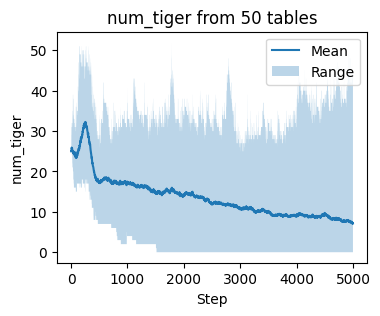

100%|██████████| 50/50 [00:00<00:00, 95.41it/s]


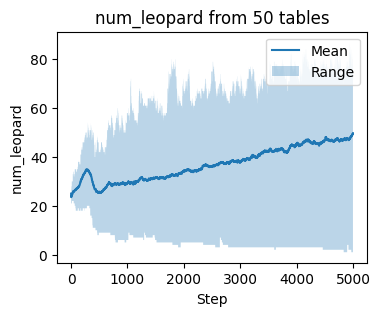

center_70


100%|██████████| 50/50 [00:01<00:00, 33.57it/s]


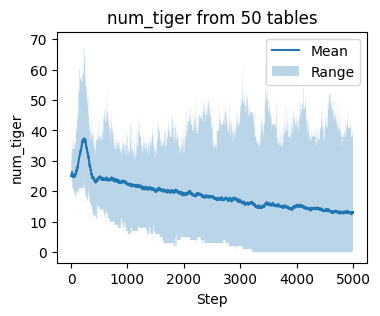

100%|██████████| 50/50 [00:00<00:00, 98.81it/s] 


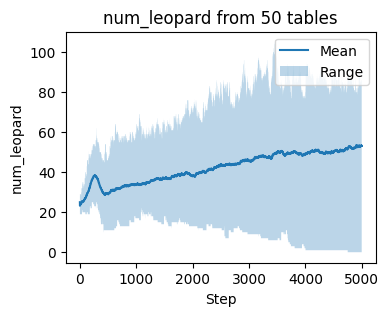

center_75


100%|██████████| 50/50 [00:01<00:00, 30.53it/s]


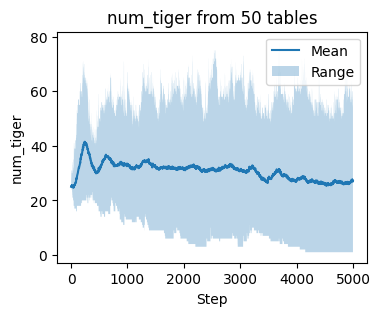

100%|██████████| 50/50 [00:00<00:00, 80.51it/s]


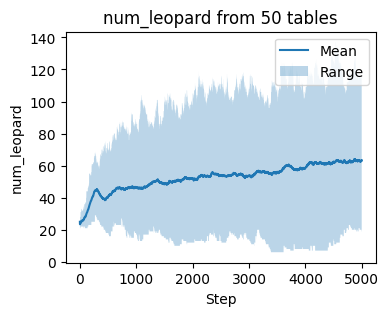

center_80


100%|██████████| 50/50 [00:01<00:00, 31.96it/s]


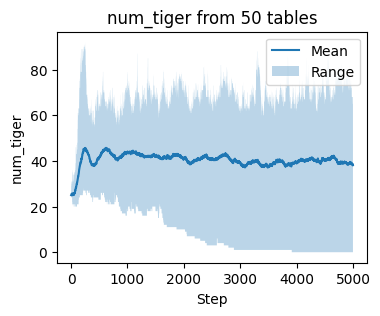

100%|██████████| 50/50 [00:00<00:00, 85.26it/s]


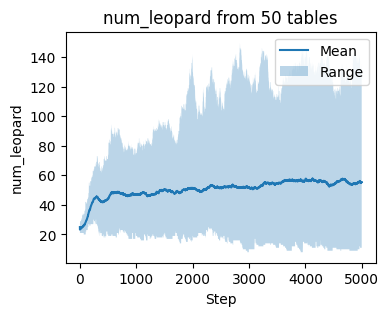

corner_25


100%|██████████| 50/50 [00:01<00:00, 35.90it/s]


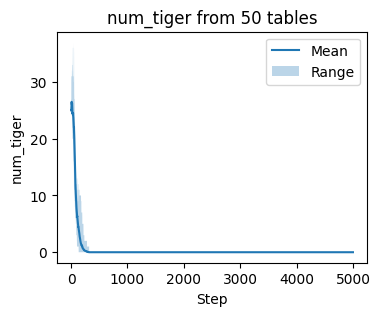

100%|██████████| 50/50 [00:00<00:00, 106.24it/s]


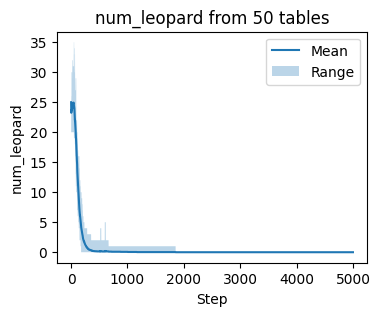

corner_30


100%|██████████| 50/50 [00:01<00:00, 33.99it/s]


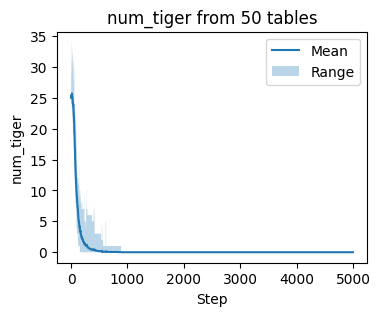

100%|██████████| 50/50 [00:00<00:00, 94.27it/s] 


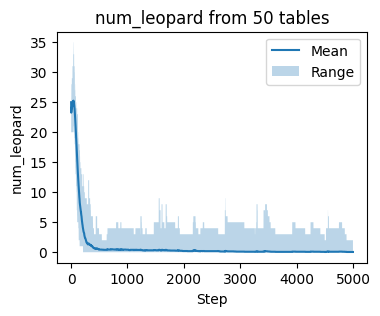

corner_35


100%|██████████| 50/50 [00:01<00:00, 36.59it/s]


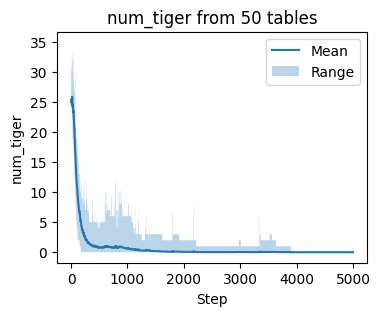

100%|██████████| 50/50 [00:00<00:00, 105.57it/s]


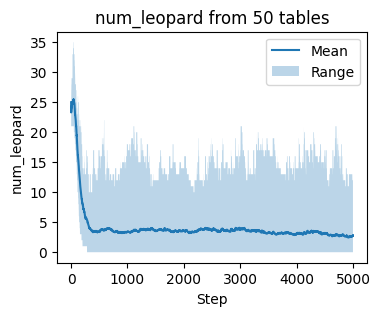

corner_40


100%|██████████| 50/50 [00:01<00:00, 36.33it/s]


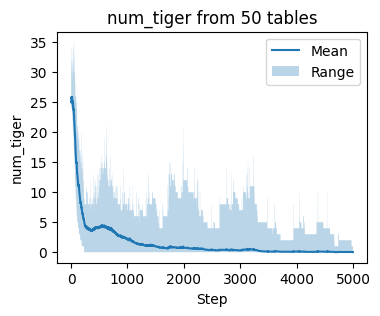

100%|██████████| 50/50 [00:00<00:00, 99.73it/s] 


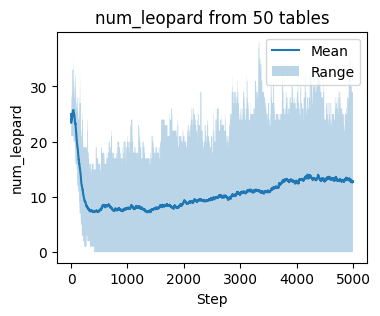

corner_45


100%|██████████| 50/50 [00:01<00:00, 34.34it/s]


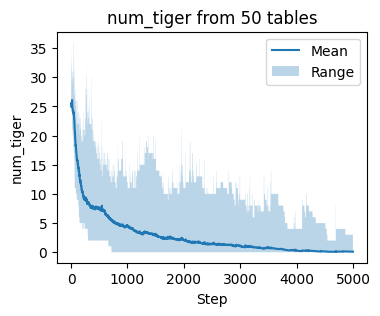

100%|██████████| 50/50 [00:00<00:00, 87.45it/s]


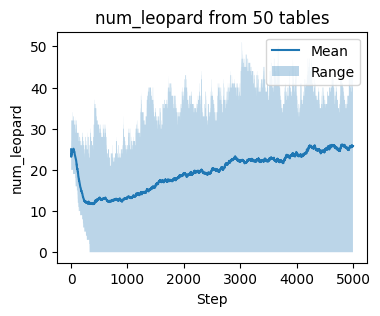

corner_50


100%|██████████| 50/50 [00:01<00:00, 29.03it/s]


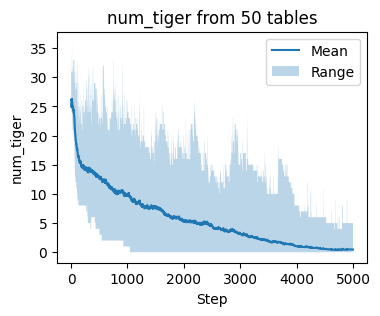

100%|██████████| 50/50 [00:00<00:00, 96.82it/s]


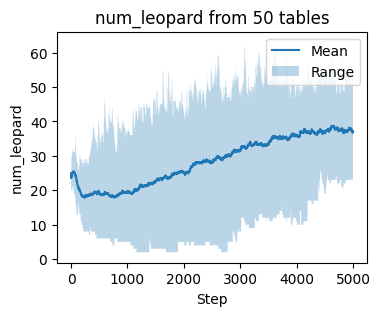

corner_55


100%|██████████| 50/50 [00:01<00:00, 32.76it/s]


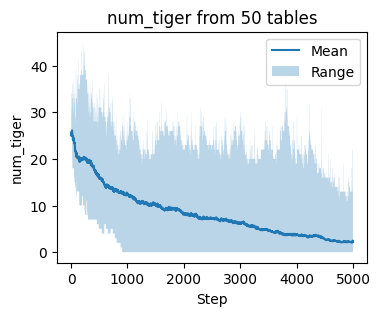

100%|██████████| 50/50 [00:00<00:00, 94.93it/s]


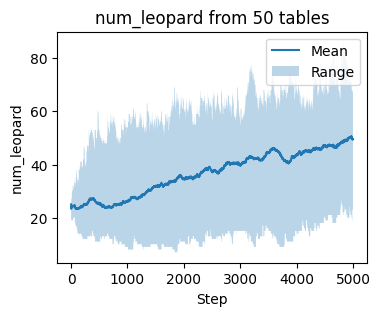

corner_60


100%|██████████| 50/50 [00:01<00:00, 33.27it/s]


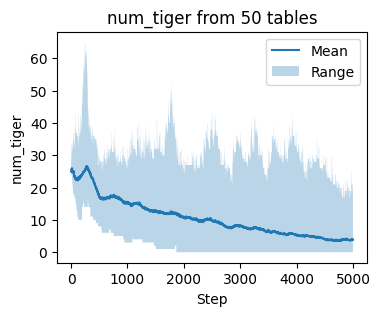

100%|██████████| 50/50 [00:00<00:00, 88.14it/s]


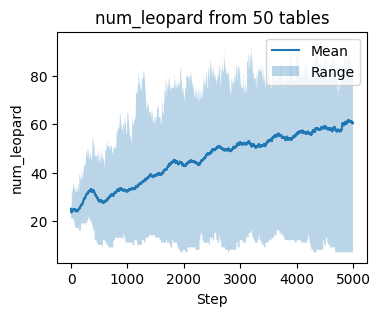

corner_65


100%|██████████| 50/50 [00:01<00:00, 34.35it/s]


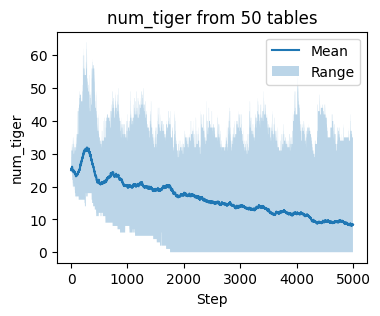

100%|██████████| 50/50 [00:00<00:00, 92.16it/s]


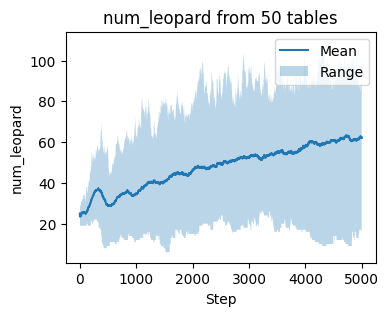

corner_70


100%|██████████| 50/50 [00:01<00:00, 33.40it/s]


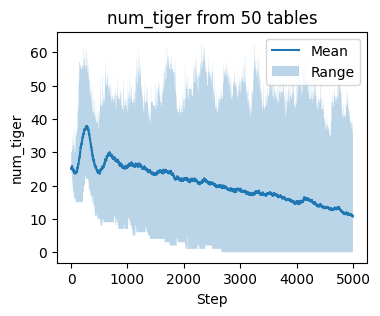

100%|██████████| 50/50 [00:00<00:00, 98.31it/s] 


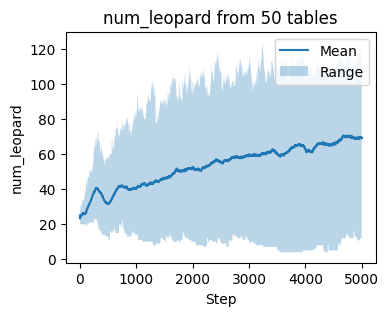

special_25


100%|██████████| 50/50 [00:01<00:00, 34.70it/s]


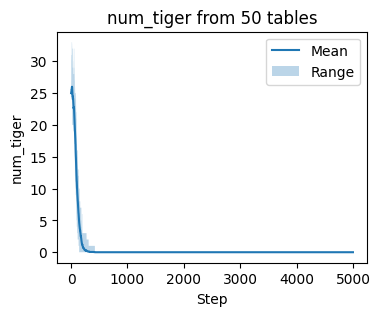

100%|██████████| 50/50 [00:00<00:00, 98.49it/s] 


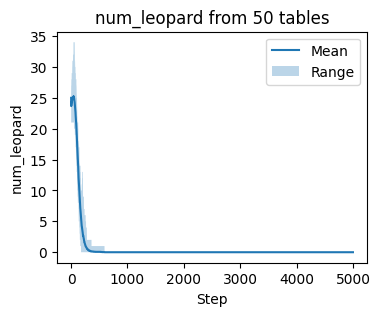

special_30


100%|██████████| 50/50 [00:01<00:00, 38.27it/s]


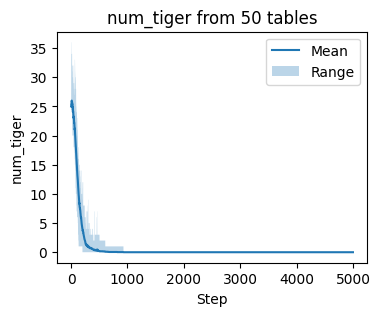

100%|██████████| 50/50 [00:00<00:00, 89.67it/s]


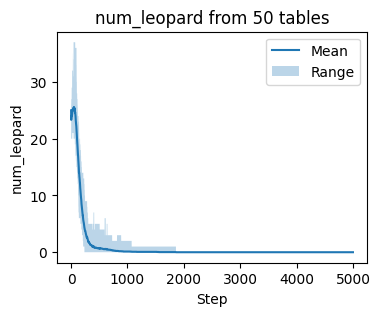

special_35


100%|██████████| 50/50 [00:01<00:00, 35.42it/s]


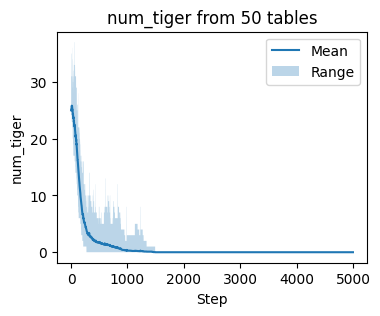

100%|██████████| 50/50 [00:00<00:00, 73.76it/s]


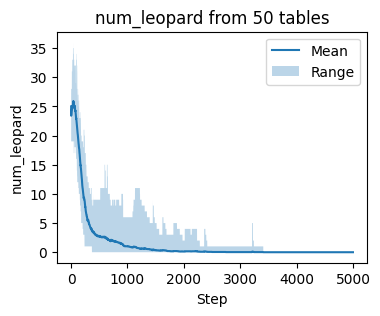

special_40


100%|██████████| 50/50 [00:01<00:00, 31.62it/s]


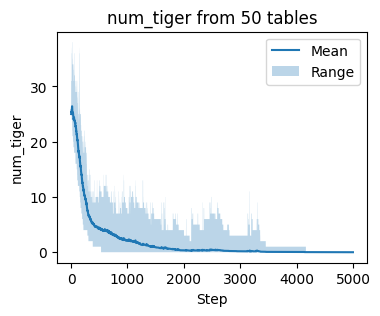

100%|██████████| 50/50 [00:00<00:00, 95.61it/s]


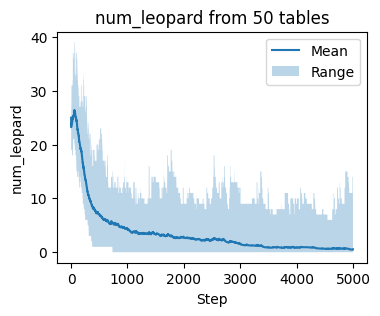

special_45


100%|██████████| 50/50 [00:01<00:00, 36.15it/s]


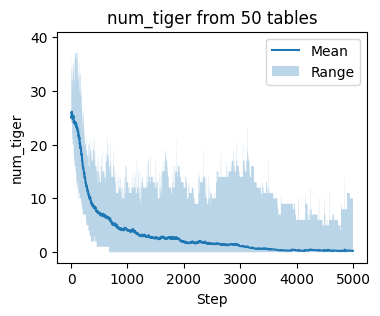

100%|██████████| 50/50 [00:00<00:00, 97.29it/s]


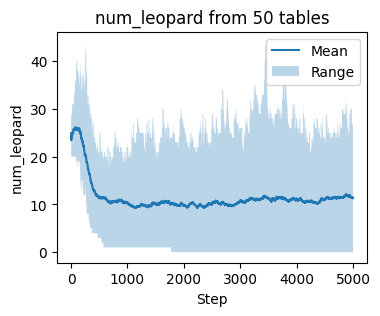

special_50


100%|██████████| 50/50 [00:01<00:00, 38.09it/s]


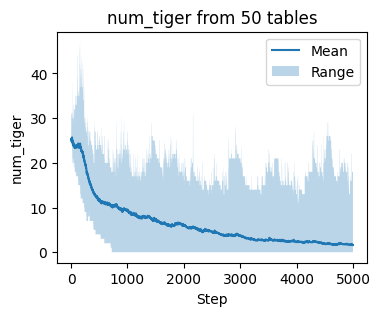

100%|██████████| 50/50 [00:00<00:00, 91.54it/s]


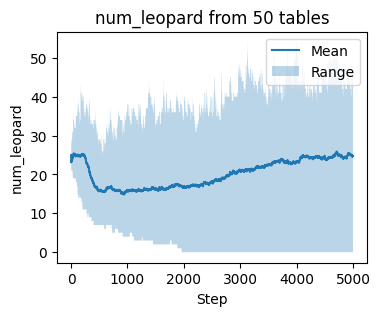

special_55


100%|██████████| 50/50 [00:01<00:00, 38.24it/s]


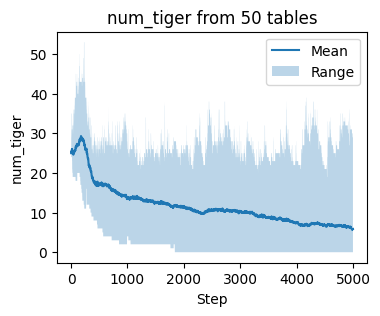

100%|██████████| 50/50 [00:00<00:00, 96.54it/s]


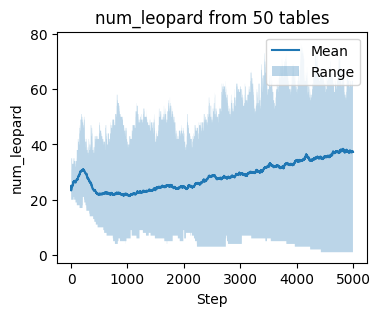

special_60


100%|██████████| 50/50 [00:02<00:00, 22.13it/s]


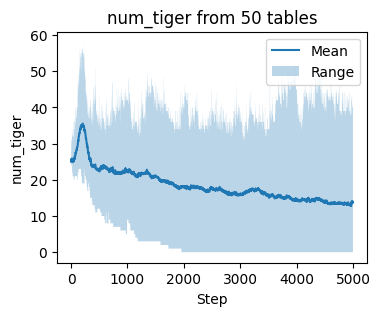

100%|██████████| 50/50 [00:00<00:00, 97.73it/s] 


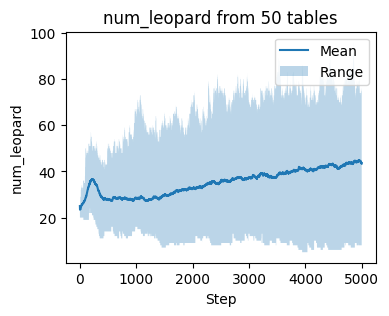

special_65


100%|██████████| 50/50 [00:01<00:00, 37.52it/s]


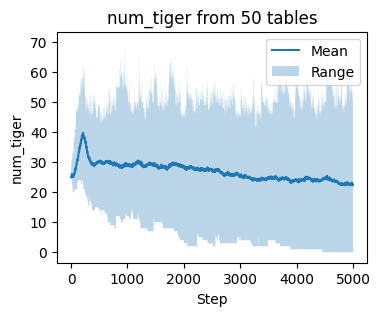

100%|██████████| 50/50 [00:00<00:00, 99.72it/s] 


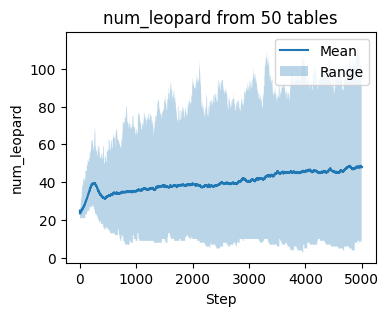

special_70


100%|██████████| 50/50 [00:01<00:00, 36.32it/s]


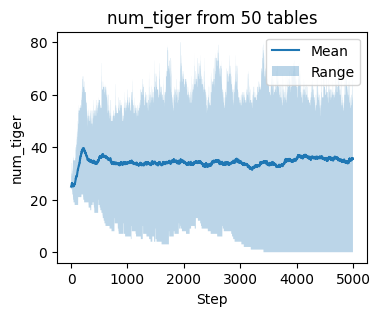

100%|██████████| 50/50 [00:00<00:00, 100.28it/s]


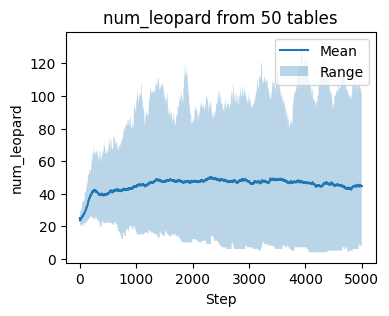

In [232]:
folder_data = "./data/map_ver_60_33/"
for folder_name in os.listdir(folder_data):
    csv_folder = os.path.join(folder_data, folder_name)

    print(folder_name)
    for key in key_list:
        if "num_tiger" not in key and "num_leopard" not in key:
            continue
        draw_data(csv_folder, key, size = (4, 3))
    print("="*100)

In [ ]:
folder_data = "./data/test/"
for folder_name in os.listdir(folder_data):
    csv_folder = os.path.join(folder_data, folder_name)

    print(folder_name)
    for key in key_list:
        if "num_tiger" not in key and "num_leopard" not in key:
            continue
        draw_data(csv_folder, key, size = (4, 3), max_len = 6500)
    print("="*100)

### Sinh map

In [5]:
import numpy as np
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
def plot_img(img, size = (8, 8)):
    plt.figure(figsize = size)
    plt.imshow(img) 
    plt.axis('off')  
    plt.show()
    return 

In [7]:
def image_rand(g_rate):
    # Kích thước ảnh
    width = 50
    height = 50

    green_pixels = int(g_rate * width * height)

    # Tạo mảng numpy chứa dữ liệu pixel
    pixels = np.zeros((height, width, 3), dtype=np.uint8)

    # Đặt màu xanh lá cho số lượng pixel cần thiết
    pixels[:green_pixels] = [0, 255, 0]

    # Đặt màu trắng cho số lượng pixel còn lại ngẫu nhiên
    white_pixels = width * height - green_pixels
    white_indices = np.random.choice(width * height, white_pixels, replace=False)
    pixels_flat = pixels.reshape(-1, 3)
    pixels_flat[white_indices] = [255, 255, 255]

    # Tạo đối tượng Image từ mảng pixel
    image = Image.fromarray(pixels)
    return image

g_rates = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
# Số lượng pixel xanh lá
for g_rate in g_rates:
    image = image_rand(g_rate)
    # plot_img(image)
    image.save(f"./map/ver01/rand_{int(g_rate*100)}.png")

In [8]:
def image_edge(g_rate):
    width = 50
    height = 50
    # Tạo mảng numpy chứa dữ liệu pixel
    pixels = np.zeros((height, width, 3), dtype=np.uint8)
    pixels[:] = [0, 255, 0]
    white_len = int((1-g_rate)*width)

    pixels[:, :white_len] = [255, 255, 255]

    image = Image.fromarray(pixels)
    return image

g_rates = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
for g_rate in g_rates:
    image = image_edge(g_rate)
    # plot_img(image)
    image.save(f"./map/ver01/edge_{int(g_rate*100)}.png")


In [10]:
def image_edge(g_rate):
    width = 50
    height = 50
    # Tạo mảng numpy chứa dữ liệu pixel
    pixels = np.zeros((height, width, 3), dtype=np.uint8)
    pixels[:] = [0, 255, 0]
    white_len = int(np.sqrt((1-g_rate)*width*height) )

    pixels[:white_len, :white_len] = [255, 255, 255]

    image = Image.fromarray(pixels)
    return image

g_rates = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
for g_rate in g_rates:
    image = image_edge(g_rate)
    # plot_img(image)
    image.save(f"./map/ver01/coord_{int(g_rate*100)}.png")


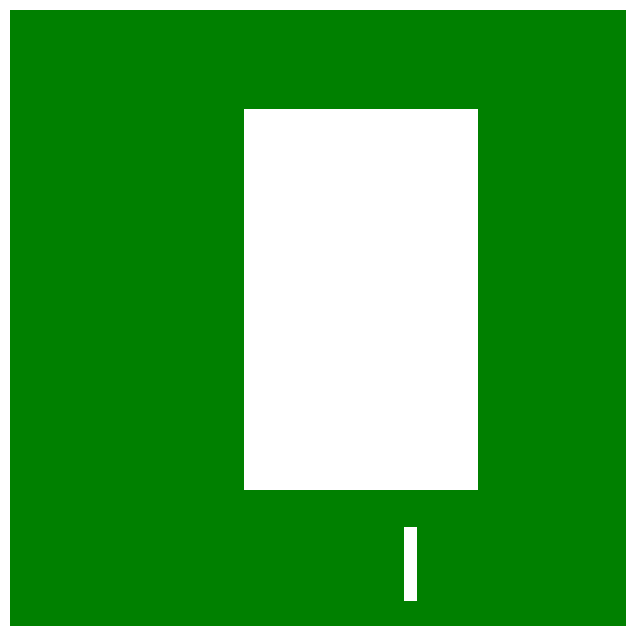

In [32]:
from PIL import Image
import numpy as np

# Kích thước ảnh
width = 50
height = 50

# Tạo ảnh ban đầu màu xanh lá
image = Image.new("RGB", (width, height), "green")

# Chuyển đổi ảnh thành mảng numpy
image_array = np.array(image)

# Tính diện tích ảnh
total_area = width * height

# Tính diện tích các vùng trắng đã tạo
white_area = 0

# Vùng trắng ngẫu nhiên
while white_area < 0.2 * total_area:
    # Chọn ngẫu nhiên tọa độ (x, y)
    x = np.random.randint(0, width)
    y = np.random.randint(0, height)

    # Chọn ngẫu nhiên kích thước vùng trắng
    w = np.random.randint(1, width - x + 1)
    h = np.random.randint(1, height - y + 1)

    # Tạo vùng trắng
    image_array[y:y+h, x:x+w] = (255, 255, 255)

    # Cập nhật diện tích các vùng trắng
    white_area = np.sum(image_array[:, :, 0] == 255)

# Tạo ảnh từ mảng numpy
result_image = Image.fromarray(image_array)

# Lưu ảnh
plot_img(result_image)

In [201]:
from PIL import Image
import os
image_folder = "./map/ver03/"

for filename in os.listdir(image_folder):
    print("-"*20)
    print(filename)
    image_path = os.path.join(image_folder, filename)
    # Đường dẫn đến ảnh PNG
    # image_path = "./map/ver02/center_80.PNG"

    # Đọc ảnh
    image = Image.open(image_path)

    # Chuyển đổi ảnh sang chế độ RGBA nếu cần thiết
    if image.mode != "RGBA":
        image = image.convert("RGBA")

    # Kích thước ảnh
    width, height = image.size

    # Đếm số pixel màu trắng
    white_pixels = 0

    # Đếm số pixel tổng cộng
    total_pixels = width * height

    # Lặp qua từng pixel trong ảnh
    for x in range(width):
        for y in range(height):
            # Lấy giá trị màu RGBA của pixel
            r, g, b, a = image.getpixel((x, y))
            
            # Kiểm tra xem màu của pixel có phải là màu trắng hay không
            if r == 255 and g == 255 and b == 255:
                white_pixels += 1

    # Tính tỉ lệ phần trăm màu trắng
    white_percentage = (white_pixels / total_pixels) * 100
    # In ra kết quả
    print("Tỉ lệ phần trăm màu xanh trong ảnh: {:.2f}%".format(100-white_percentage))


--------------------
corner_25.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 25.00%
--------------------
corner_30.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 30.00%
--------------------
corner_35.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 35.00%
--------------------
corner_40.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 39.96%
--------------------
corner_45.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 44.92%
--------------------
corner_50.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 50.00%
--------------------
corner_55.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 55.00%
--------------------
corner_60.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 60.08%
--------------------
corner_65.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 64.96%
--------------------
corner_70.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 70.04%
--------------------
raster_map_303.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 25.00%
--------------------
raster_map_304.PNG
Tỉ lệ phần trăm màu xanh trong ảnh: 30.00%
--------------------
raster_map_305.PNG
Tỉ lệ phần tră